<a href="https://colab.research.google.com/github/JRiveraB23/SyS05/blob/main/Copia_de_Copia_de_Taller_3_Te%C3%B3rico_Pr%C3%A1ctico_Se%C3%B1ales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title FUNCIONES Y LIBRER√çAS

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy
import sympy as sym
import ipywidgets

from scipy import signal
from IPython.display import Markdown as md
from ipywidgets import interact
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from sympy import Symbol
from sympy import sin, cos
from sympy import oo
from sympy import *
from sympy import DiracDelta, S
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt
from numpy import sin, sqrt, cos
from scipy import signal
from matplotlib import animation, rc
from IPython.display import HTML
import warnings
sym.init_printing()

##***Nota:***
Todos los procedimientos matem√°ticos se realizaron en el siguiente PDF. Si no hay ning√∫n procedimiento en alg√∫n punto, es porque este se encuentra en el [PDF](https://drive.google.com/file/d/1hbKgUaa98ALVggplKjmNXAda1FgOc7WV/view?usp=sharing).

# *Transformada de Laplace y an√°lisisde sistemas lineales e invariantes con el tiempo*

**1.**Consultar y realizar los ejercicios del cuaderno *Definici√≥n transformada de Laplace*.

Obtenga $X(s)$ junto con su ROC de la siguiente gr√°fica de polos y ceros.

![Ilustraci√≥n de los polos y ceros en un gr√°fico de polos y ceros](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/pz_plot.png?raw=1)

**2** Consultar y realizar los ejercicios del cuaderno *Propiedades b√°sicas transformada de Laplace*.

Determinar los polos y ceros de la transforma de Laplace $L\{œµ*sin(\omega_o t)\} $ mediante el c√°lculo manual y extendido el ejemplo anterior.
¬øQu√© simetr√≠a muestran los polos y los ceros en el plano s?



**3** Demuestre las siguiente propiedades (sin utilizar tablas de propiedades).

**4** Encuentre la transformada de Laplace, dibuje el esquime de polos y ceros y la regi√≥n de convergencia (ROC).


**5.** Consultar y realizar los ejercicios del cuaderno de la Transformada inversa de Laplace.

**6.** Consultar y realizar los ejercicios del cuaderno Autofunciones y SLITS.

**Ejercicio**

* ¬øQu√© relaci√≥n tiene $\lambda$ con el la salida obtenida al resolver la EDO?

> ***R/*** En el cuaderno se plante√≥ que $x(t)=e^{st}$ y $y(t)=\lambda\cdot e^{st}$. Y se reemplaza en la ecuaci√≥n

$$
x(t)=a_{0}y(t) + a_{1}\frac{dy(t)}{dt} + a_{2}\frac{d^{2}y(t)}{dt^{2}}
$$

Entonces quedar√≠a

$$
e^{st}=a_{0}\lambda e^{st} + a_{1}\lambda se^{st} + a_{2} \lambda s^{2}e^{st}
$$

Agrupando t√©rminos comunos dar√≠a

$$
e^{st}=\lambda e^{st}(a_{0}+a_{1}s+a_{2}s^{2})
$$

Luego, se despeja $\lambda$ y quedar√≠a

$$
\lambda=\frac{1}{a_{0}+a_{1}s+a_{2}s^{2}}
$$

Como se puede evidenciar, para la salida $y(t)$ planteada en el cuaderno, $\lambda$ dio lo mismo, pero multiplic√°ndolo por $e^st$.

* ¬øPuede generalizar sus resultados a una EDO de orden arbitrario?

> ***R/*** S√≠, esta expresi√≥n se puede generalizar a

$$
x(t)=a_{0}y(t) + a_{1}\frac{dy(t)}{dt} + a_{2}\frac{d^{2}y(t)}{dt^{2}} + \ldots + a_m\frac{d^{m}y(t)}{dt^m}
$$

Entonces quedar√≠a

$$
e^{st}=a_{0}\lambda e^{st} + a_{1}\lambda se^{st} + a_{2} \lambda s^{2}e^{st}+ \ldots + a_m\lambda s^m e^{st}
$$

Agrupando t√©rminos comunos dar√≠a

$$
e^{st}=\lambda e^{st}(a_{0}+a_{1}s+a_{2}s^{2}+\ldots + a_ms^m)
$$

Luego, se despeja $\lambda$ y quedar√≠a

$$
\lambda=\frac{1}{a_{0}+a_{1}s+a_{2}s^{2}+\ldots+a_{m} \lambda s^{m}}
$$


**7** Encuentre la funci√≥n de transferencia en lazo abierto para un circuito RLC SERIE (entrada tensi√≥n de alimentaci√≥n- s√°lida tensi√≥n del capacitor) y un circuito RCL EN PARLELO (entrada corriente de alimentaci√≥n - salida corriente en el inductor). NOTA: Tenga en cuenta las condiciones iniciales del sistema seg√∫n lo explicado en el material de apoyo Circuito RLC y An√°lisis de redes el√©ctricas.

**8.** Para las funciones de transferencia en lazo abierto encontradas en el punto anterior, encuentre la expresi√≥n de la salida en el tiempo para una configuraci√≥n en lazo cerrado del sistema, en funci√≥n de R,L,C para las siguientes entradas: 1) impulso, 2) Escal√≥n unitario 3) Rampa.

Compruebe los resultados en simulaci√≥n sobre python (utilizando sympy) y gr√°fique la se√±al de salida para cada caso.

## i) Impulso

Condiciones iniciales cero

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1), s, t) # entrada impulso que en laplace es 1
y = y.simplify()
y

        -t    ‚éõ‚àö51‚ãÖt‚éû
20‚ãÖ‚àö51‚ãÖ‚ÑØ  ‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü
              ‚éù  3  ‚é†
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
          51         

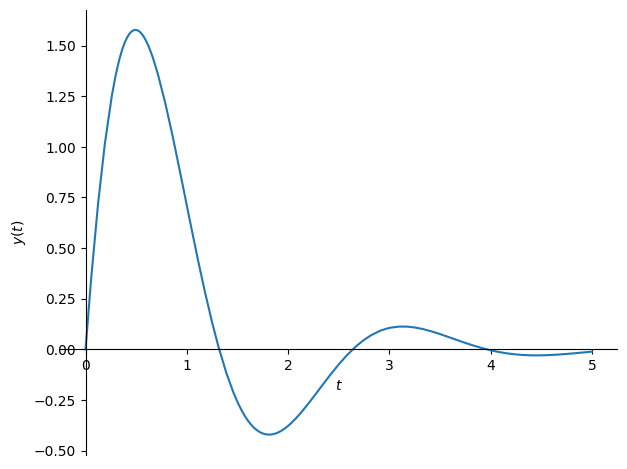

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [ ]:
yext = y
yext.simplify()

        -t    ‚éõ‚àö51‚ãÖt‚éû
20‚ãÖ‚àö51‚ãÖ‚ÑØ  ‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü
              ‚éù  3  ‚é†
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
          51         

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L‚ãÖi‚ÇÄ           y‚ÇÄ‚ãÖ(C‚ãÖL‚ãÖs + C‚ãÖR) 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
     2                    2            
C‚ãÖL‚ãÖs  + C‚ãÖR‚ãÖs + 1   C‚ãÖL‚ãÖs  + C‚ãÖR‚ãÖs + 1

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 1).subs(y0, -1), s, t)
yint

       -t    ‚éõ‚àö51‚ãÖt‚éû                 
7‚ãÖ‚àö51‚ãÖ‚ÑØ  ‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü                 
             ‚éù  3  ‚é†    -t    ‚éõ‚àö51‚ãÖt‚éû
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ - ‚ÑØ  ‚ãÖcos‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü
         51                   ‚éù  3  ‚é†

In [ ]:
y = yext + yint
y.simplify()

‚éõ         ‚éõ‚àö51‚ãÖt‚éû             ‚éû    
‚éú9‚ãÖ‚àö51‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü             ‚éü    
‚éú         ‚éù  3  ‚é†      ‚éõ‚àö51‚ãÖt‚éû‚éü  -t
‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ - cos‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü‚éü‚ãÖ‚ÑØ  
‚éù       17             ‚éù  3  ‚é†‚é†    

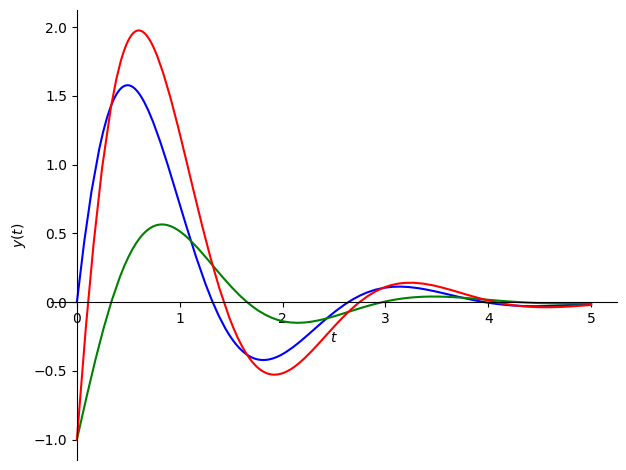

In [ ]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

## ii) Escal√≥n unitario

Condiciones iniciales cero

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:1 , L: sym.Rational('.5'), C: sym.Rational('.3')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t) # entrada escal√≥n unitario en laplace es 1/s
y = y.simplify()
y

‚éõ            ‚éõ‚àö51‚ãÖt‚éû             ‚éû    
‚éú     ‚àö51‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü             ‚éü    
‚éú t          ‚éù  3  ‚é†      ‚éõ‚àö51‚ãÖt‚éû‚éü  -t
‚éú‚ÑØ  - ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ - cos‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü‚éü‚ãÖ‚ÑØ  
‚éù           17            ‚éù  3  ‚é†‚é†    

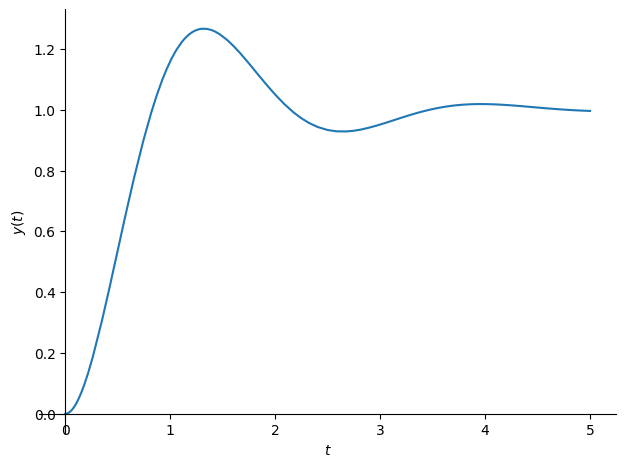

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [ ]:
yext = y
yext.simplify()

‚éõ            ‚éõ‚àö51‚ãÖt‚éû             ‚éû    
‚éú     ‚àö51‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü             ‚éü    
‚éú t          ‚éù  3  ‚é†      ‚éõ‚àö51‚ãÖt‚éû‚éü  -t
‚éú‚ÑØ  - ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ - cos‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü‚éü‚ãÖ‚ÑØ  
‚éù           17            ‚éù  3  ‚é†‚é†    

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L‚ãÖi‚ÇÄ           y‚ÇÄ‚ãÖ(C‚ãÖL‚ãÖs + C‚ãÖR) 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
     2                    2            
C‚ãÖL‚ãÖs  + C‚ãÖR‚ãÖs + 1   C‚ãÖL‚ãÖs  + C‚ãÖR‚ãÖs + 1

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 2).subs(y0, 3), s, t)
yint

        -t    ‚éõ‚àö51‚ãÖt‚éû                   
29‚ãÖ‚àö51‚ãÖ‚ÑØ  ‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü                   
              ‚éù  3  ‚é†      -t    ‚éõ‚àö51‚ãÖt‚éû
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + 3‚ãÖ‚ÑØ  ‚ãÖcos‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü
          51                     ‚éù  3  ‚é†

In [ ]:
y = yext + yint
y.simplify()

‚éõ               ‚éõ‚àö51‚ãÖt‚éû               ‚éû    
‚éú     26‚ãÖ‚àö51‚ãÖsin‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü               ‚éü    
‚éú t             ‚éù  3  ‚é†        ‚éõ‚àö51‚ãÖt‚éû‚éü  -t
‚éú‚ÑØ  + ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + 2‚ãÖcos‚éú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚éü‚éü‚ãÖ‚ÑØ  
‚éù             51               ‚éù  3  ‚é†‚é†    

En la siguiente gr√°fica se presentan: la parte interna $y_\text{int}(t)$ (L√≠nea verde), la parte externa $y_\text{ext}(t)$ (L√≠nea azul), y se√±al de salida $y(t)$ (L√≠nea roja)

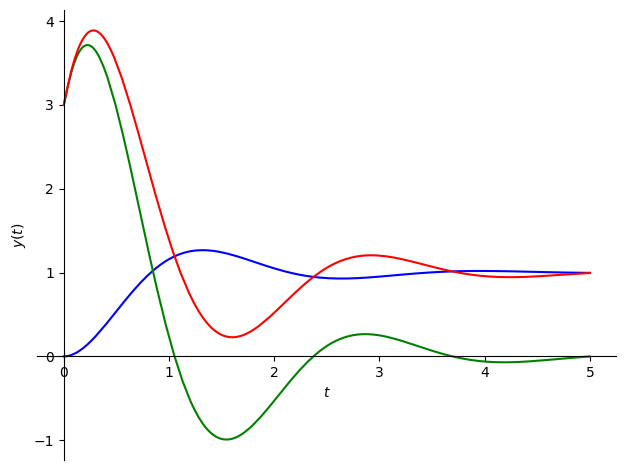

In [ ]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

## iii) Rampa

Condiciones iniciales cero

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = X/(L*C*s**2 + R*C*s + 1)
RLC = {R:2 , L: sym.Rational('.8'), C: sym.Rational('.8')}

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s**2), s, t) # entrada rampa en lapalce 1/s**2
y = y.simplify()

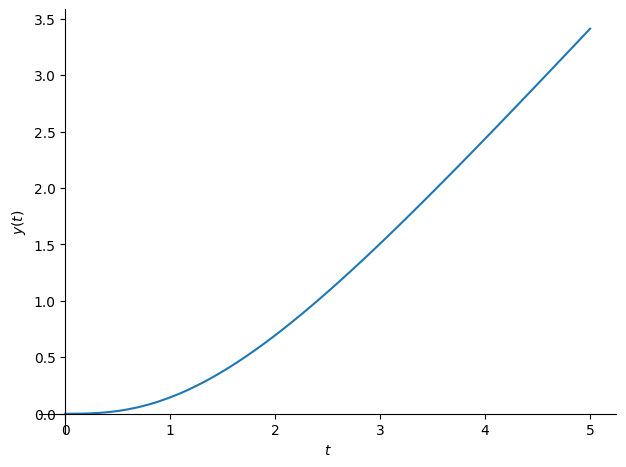

In [ ]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$');

Condiciones iniciales diferentes cero

\begin{equation}
y(t) = y_\text{ext}(t) + y_\text{int}(t)
\end{equation}

In [ ]:
yext = y
yext.simplify()

                      -5‚ãÖt 
       -5‚ãÖt           ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
       ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ            4  
         4     8   8‚ãÖ‚ÑØ     
t + t‚ãÖ‚ÑØ      - ‚îÄ + ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
               5      5    

In [ ]:
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L‚ãÖi‚ÇÄ           y‚ÇÄ‚ãÖ(C‚ãÖL‚ãÖs + C‚ãÖR) 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
     2                    2            
C‚ãÖL‚ãÖs  + C‚ãÖR‚ãÖs + 1   C‚ãÖL‚ãÖs  + C‚ãÖR‚ãÖs + 1

In [ ]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, -1).subs(y0, 4), s, t)
yint

      -5‚ãÖt            
      ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ      -5‚ãÖt 
        4        ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
15‚ãÖt‚ãÖ‚ÑØ             4  
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ + 4‚ãÖ‚ÑØ     
     4                

In [ ]:
y = yext + yint
y.simplify()

‚éõ                    5‚ãÖt      ‚éû  -5‚ãÖt 
‚éú                    ‚îÄ‚îÄ‚îÄ      ‚éü  ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
‚éú                     4       ‚éü    4  
‚éù95‚ãÖt + 4‚ãÖ(5‚ãÖt - 8)‚ãÖ‚ÑØ    + 112‚é†‚ãÖ‚ÑØ     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
                  20                  

En la siguiente gr√°fica se presentan: la parte interna $y_\text{int}(t)$ (L√≠nea verde), la parte externa $y_\text{ext}(t)$ (L√≠nea azul), y se√±al de salida $y(t)$ (L√≠nea roja)

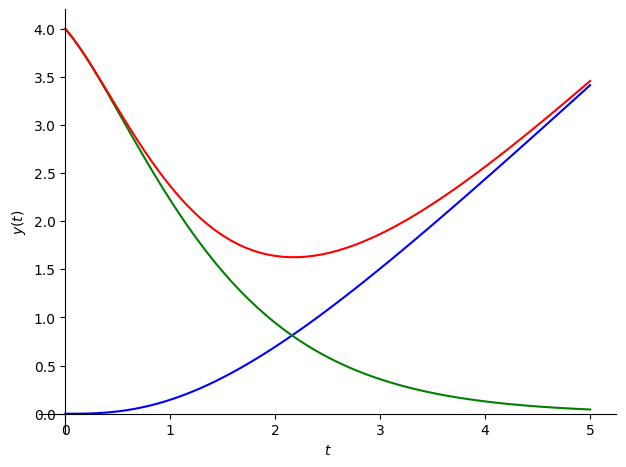

In [ ]:
p1 = sym.plot(yext, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p3 = sym.plot(y, (t, 0, 5), line_color='r', show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()

**9.** Consulte en que consiste un sistema subamortiguado, sobreamortiguado y de amortiguamiento cr√≠tico. Genere una simulaci√≥n para ejemplificar cada uno de los casos con el sistema en R,L,C serie y paralelo estudiados.



##**Circuito En Serie**

In [ ]:
#@title Ingrese los valores para el circuito RLC en serie.

R=40 #@param {type:"number",min:0}
L=0.1 #@param {type:"number",min:0}
C=5 #@param {type:"number",min:0}

s=sym.symbols('s')

In [ ]:

Wn=1/np.sqrt(L*C)
md=(f'El valor de $\omega_n$ es: {Wn:.2f}')

In [ ]:
K=1
md=(f'El valor de $K$ es: {K:.2f}')

In [ ]:
Xi=(R*C)/(2*np.sqrt(L*C))
md=(f'El valor de $\Xi$ es: {Xi:.2f}')

In [ ]:
Wd=Wn*np.sqrt(1-Xi**2)
md=(f'El valor de $\omega_d$ es: {Wd:.2f}')

<ipython-input-32-512236e1fbc4>:1: RuntimeWarning: invalid value encountered in sqrt
  Wd=Wn*np.sqrt(1-Xi**2)


In [ ]:
if Xi>1:
  print("El sistema es sobreamortiguado")
elif Xi<0:
  print("El sistema es inestable")
elif Xi==1:
  print("El sistema es criticamente amortiguado")
elif Xi==0:
  print("El sistema es oscilador")
else:
  print("El sistema es subamortiguado")

El sistema es sobreamortiguado


In [ ]:
num=[0, 0, Wn**2]
den=[1, 2*Wn*Xi, Wn**2]

Hs=signal.TransferFunction(num,den)

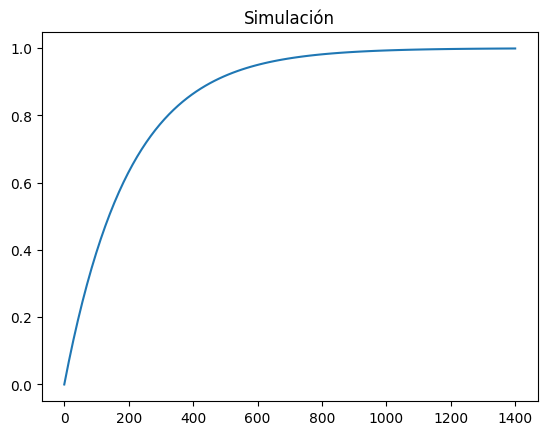

In [ ]:
time, response=signal.step(Hs)

plt.plot(time,response)
plt.title("Simulaci√≥n")
plt.show()

##**Circuito En Paralelo**

In [ ]:
#@title Ingrese los valores para el circuito RLC en serie.

R=0.01 #@param {type:"number",min:0}
L=0.1 #@param {type:"number",min:0}
C=250 #@param {type:"number",min:0}

s=sym.symbols('s')

In [ ]:
Wnp=1/np.sqrt(L*C)
md=(f'El valor de $\omega_n$ es: {Wnp:.2f}')

In [ ]:
Kp=1/R
md=(f'El valor de $K$ es: {Kp:.2f}')

In [ ]:
Xip=np.sqrt(L*C)/(2*R*C)
md=(f'El valor de $\Xi$ es: {Xip:.2f}')

In [ ]:
Wdp=Wnp*np.sqrt(1-Xip**2)
md=(f'El valor de $\omega_d$ es: {Wdp:.2f}')

In [ ]:
if Xip>1:
  print("El sistema es sobreamortiguado")
elif Xip<0:
  print("El sistema es inestable")
elif Xip==1:
  print("El sistema es criticamente amortiguado")
elif Xip==0:
  print("El sistema es oscilador")
else:
  print("El sistema es subamortiguado")

El sistema es criticamente amortiguado


In [ ]:
num=[0, 0, Wnp**2]
den=[1, 2*Wnp*Xip, Wnp**2]

Hs=signal.TransferFunction(num,den)

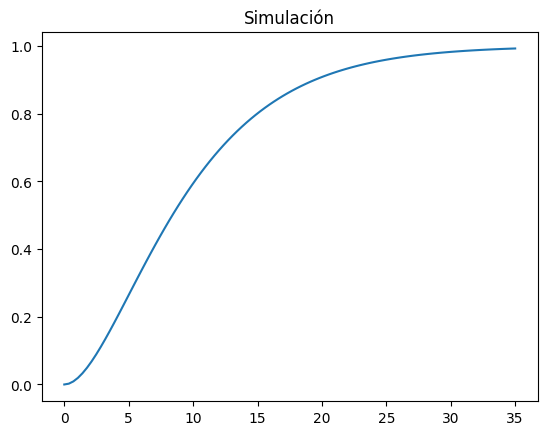

In [ ]:
time, response=signal.step(Hs)

plt.plot(time,response)
plt.title("Simulaci√≥n")
plt.show()

**10.** Para los sistemas del punto 9, encuentre las expresiones para el factor de amortiguamiento $\xi$, la frecuencia natural no amortiguada $\omega_n$ y la frecuencia natural amortiguada $\omega_d$ en funci√≥n de R,L,C. Nota: asuma las condiciones iniciales cero.

##Transformada Z y filtros digitales



**1.**
Consulte en que consiste la transformada Z. Explique las semejanzas y diferencias entre la serie de Fourier, transformada de Laplace y la transformada Z.

**2.**
Encuentre la transformada Z para las siguiente se√±ales.

**3.**
Consulte en que consiste el metodo de dise√±o de filtros FIR por ventaneo(Ver funcion firwin y material de apoyo). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR.


###Filtros de respuesta finita al impulso (FIR)

Los filtros de respuesta finita al impulso, FIR por sus siglas en ingl√©s, son filtros que no tienen realimentaci√≥n. Gracias a esto, se caracterizan por tener una fase perfectamente lineal y son siempre estables. Tambi√©n, su montaje es muy sencillo. Se rige por la siguiente ecuaci√≥n:

$$
y[n]=\sum_{k=0}^{N-1}h[k]x[n-k]
$$

Si se le aplicara la transformada Z, quedar√≠a como

$$
H[z]=\sum_{k=0}^{N-1}h[k]z^{-k}
$$

![Ilustraci√≥n FIR](https://upload.wikimedia.org/wikipedia/commons/3/35/FIR_estr.PNG)

Como se puede ver en la imagen, la $T$ es el retardo y $h(n)$ los coeficientes. Los polos se encuentran en el origen y los ceros se presentan en pares de rec√≠procos si el filtro se dise√±a para tener fase lineal. El uso normal de estos filtros se debe a la modificaci√≥n mediante la atenuaci√≥n o amplificaci√≥n de la frecuencia, controlando tonos graves o agudos dependiendo su necesidad.


###Filtros de respuesta infinita al impulso (IIR)}

Los filtros de respuesta infinita al impulso, IIR por sus siglas en ingl√©s, tienen una realimentaci√≥n, por lo cual dependen de su se√±ales de entrada y salida. Uno de los riesgos con este tipo filtros es que si se dise√±a de forma incorrecta, pueden llegar a ser inestables. Estos filtros se caracterizan con la siguiente ecuaci√≥n

$$
y[n]=b_0x[n]+b_1x[n-1]+ \ldots + b_Nx[n-N]-a_1y[n-1]-a_2y[n-2]- \ldots -a_My[n-M]
$$

donde $a$ y $b$ son los coeficientes del filtro. Si se aplica la transformada Z, esta dar√≠a

$$
H[z]=\frac{\sum_{k=0}^Nb_kz^{-k}}{1+\sum_{k=1}^M a_kz^{-k}}
$$

![Ilustraci√≥n IIR](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/IIR-filter.png/220px-IIR-filter.png)

###Paralelo

* Mediante la respuesta en impulso podemos diferenciar mediante el numero de t√©rminos, puesto que en un FIR estos son finitos al contrario de un IIR.

* La retroalimentaci√≥n  es un factor determinante ya que define la estabilidad dependiendo la construcci√≥n del circuito, siendo en el FIR menos relevante ya que es carente de esta logrando una estabilidad perfecta.

* Mientras que la fase del FIR es completamente lineal, la del IRR puede ser bidireccional pero nunca lineal.


**4.** Presente una comparaci√≥n entre las estrategias de dise√±o mediante invarianza al impulso y transofrmaci√≥n bilineal

###Invarianza al impulso


*   Se mantiene la respuesta impulsional de ambos filtros
*   La estabilidad se mantiene (Filtros anal√≥gicos estables dan lugar a filtros digitales estables).
* La relaci√≥n entre frecuencias es *lineal* ya que: \\
Anal√≥gico:
$s_k=jŒ©$ \\
Digital:
$z=e^{s_kT}=e^{jŒ©T}$  $w=Œ©T$ \\
$z=e^{jw}$
$w=Œ©T$
* Causa que se√±ales continuas *distintas* se tornen *indistinguibles* cuando se muestrea. Sabemos que en los filtros ideales su respuesta no puede ser cero en una banda por lo que independientemente del valor de $T$, siempre habr√° una contribuci√≥n de $H(‚Ñ¶)$ que no verificar√° el teorema de muestreo. Si la frecuencia de muestreo es $ùùÆ_s= 2œÄFs$ , todas las frecuencia anal√≥gicas por encima de $‚Ñ¶_s/2$ producir√°n *aliasing*.
* Para un correcto funcionamiento, el filtro anal√≥gico debe verificar $H(Œ©)‚âÖ0$  $|Œ©|>\frac{Œ©_s}{2}$.
* Este m√©todo no es adecuado para el dise√±o de filtros pasa-alta ni elimina-banda. Adem√°s, si tenemos en cuenta los prototipos anal√≥gicos considerados, los filtros de Tchebyshev II y los El√≠pticos presentar√°n peor comportamiento debido al rizado en la banda no pasante.

###Transformaci√≥n bilineal
* La diferencia entre el filtro anal√≥gico y el digital decrece a medida que T $\rightarrow$ 0, ya que la aproximaci√≥n de los trapecios es m√°s exacta.
*  La estabilidad se mantiene (Filtros anal√≥gicos estables dan lugar a filtros digitales estables).La relaci√≥n entre frrecuencias asegura que si $Œ©_1<Œ©_2 \rightarrow œâ_1<œâ_2$, es decir, un pasa-baja anal√≥gico dar√° lugar a un pasa-baja digital, as√≠ con todo el resto de filtros.
* La relaci√≥n entre las frecuencias anal√≥gica y digitales es *no lineal* y viene dada por:
\begin{align*}
œâ=2.Tan^{-1}\left(\frac{TùõÄ}{2}\right)          &   &Œ©=\frac{2}{T}.Tan\left( \frac{œâ}{2} \right)\\
\end{align*}
Donde:
$œâ=2œÄ\frac{F}{F_s}$ \\
Es decir, se lleva a cabo una compresi√≥n de las frecuencias anal√≥gicas. Este proceso de ‚ÄúDeformaci√≥n‚Äù es lo que se denomina *warping*.

**5.** Realizar los ejercicio propuestos en el cuaderno Filtros digitales y transformada Z.

1. Descargue 10 segundos de la canci√≥n de su preferencia desde youtube, y gener√© un filtro pasabanda (el usuario debe poder definir las frecuencias de corte) para cada uno de los filtros descritos (el usuario tambi√©n debe poder fijar los par√°metros de dise√±o de cada filtro). Compare los resultados de los filtros estudiados en este cuaderno tipo IIR para dise√±o Butterworth, Chebyshev 1, Chebyshev 2, Bessel y El√≠ptico.

> **R/** El punto 5.1 y 5.3 se encuentran en el siguiente [colab](https://colab.research.google.com/drive/1FUuFctRcHi4Fz7u1TOZJ15Gntf8KnPLk?usp=sharing)

2. Consulte en qu√© consiste el m√©todo de dise√±o de filtros FIR por ventaneo (Ver funci√≥n [firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) y [material de apoyo](https://ccrma.stanford.edu/~jos/sasp/Window_Method_FIR_Filter.html#:~:text=The%20window%20method%20for%20digital,and%20windows%20for%20spectrum%20analysis)). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR.

**R/** Filtros FIR

Ventajas:
- Su respuesta al impulso es f√°cil de obtener a trav√©s del vector de coeficientes.
- Su respuesta en frecuencia es f√°cil de analizar a trav√©s de la transformada de Fourier.
- Son f√°ciles de dise√±ar definiendo su respuesta en frecuencia y usando la transformada inversa.

Desventajas:

- Es necesario un gran n√∫mero de coeficientes para conseguir las mismas prestaciones que dar√≠a un filtro IIR de orden mucho menor.
- Para conseguir una buena resoluci√≥n a bajas frecuencias se requieren muchos coeficientes.
- Al necesitar m√°s coeficientes, tiene un retardo grande. A veces no aptos para directos.

Filtros IIR

Ventajas:
- Requieren menos coeficientes para hacer operaciones similares de filtrado.
- Se ejecutan m√°s r√°pido y no requieren de memoria externa.

Desventajas:

- La respuesta de la fase no es lineal.
- La naturaleza recursiva de estos filtros hace que sean m√°s dif√≠ciles de dise√±ar e implementar.

3. Incluya la implementaci√≥n del filtro `firwin` en el punto 1.